In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the Room Occupancy Estimation dataset
df = pd.read_csv("/content/Occupancy_Estimation.csv")

In [14]:
df.dropna(inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True) # Drop date and time columns
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X.astype(float))

In [15]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [19]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  2.68 Best Epsilon =  3.37
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  6.41 Best Epsilon =  4.33
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  1.1 Best Epsilon =  6.52
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  2.37 Best Epsilon =  7.54
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  0.79 Best Epsilon =  0.81
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  8.82 Best Epsilon =  2.29
Best Accuracy =  0.99 Best Kernel =  linear Best Nu =  2.31 Best Epsilon =  3.99
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  9.81 Best Epsilon =  6.8
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  0.58 Best Epsilon =  8.98
Best Accuracy =  0.99 Best Kernel =  linear Best Nu =  4.9 Best Epsilon =  9.93


In [20]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.99,poly,2.68,3.37
1,2,0.99,poly,6.41,4.33
2,3,0.99,poly,1.10,6.52
3,4,1.00,linear,2.37,7.54
4,5,0.99,poly,0.79,0.81
5,6,0.99,poly,8.82,2.29
6,7,0.99,linear,2.31,3.99
7,8,0.99,poly,9.81,6.80
8,9,0.99,poly,0.58,8.98
9,10,0.99,linear,4.90,9.93


In [21]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [22]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))


In [23]:
train_sizes
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

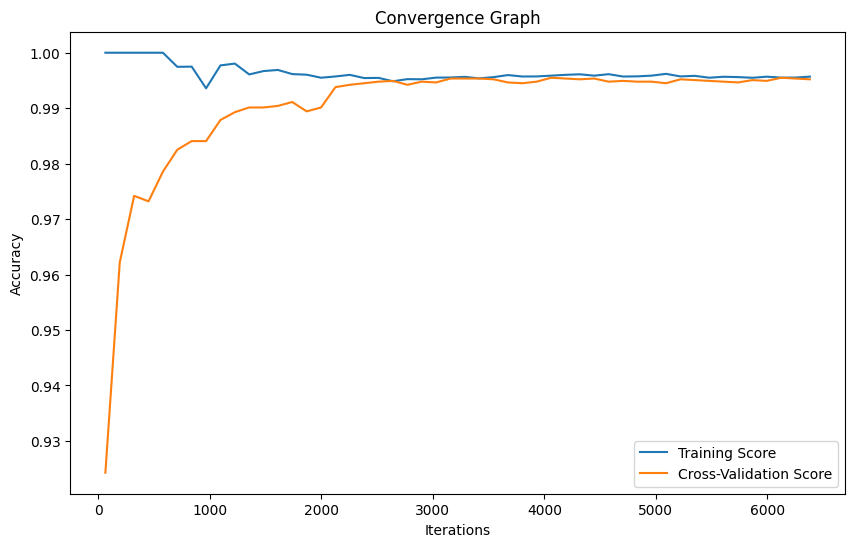

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()